# <h1><span style="color:crimson;"><center>**Intelligent Culpability Detection System Using Computer Vision (Damage Detection and Estimation)**</center></span></h1>

## Group Members:

* Ehab Abu-Alqumboz
* Hebah Soliman
* Rand Barnawi
* Khadija BaOthman

## Task

Detect Damage and determine the position of the damage in the car to estimate the cupability percentage.



In [1]:
!nvidia-smi

Wed Aug 16 17:05:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()

## Install YOLOv8



In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

## Inference with Pre-trained COCO Model

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 67.0MB/s]

2023-08-16 17:05:42.087385: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 17:05:43.678537: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 77.8MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 105.7ms
Speed: 0.7ms pre-process, 105.7ms inference, 341.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ml23bP9VxX8GsJTUzj13")
project = rf.workspace("university-of-jeddah-yq1po").project("damage-car-0cgik")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=0d7e66150ace6ad66b3b8cee2b5976f8672f2f3a7280ab5c774446b845e86fea
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pypar

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Damage-car-1 in yolov8:: 100%|██████████| 1054/1054 [00:00<00:00, 2492.59it/s]


## Custom Training
 Train the pre-trained model with custom data that has been created by roboflow using 25 epoch

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 169MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Damage-car-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fals

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1692205585.79197678273b.1025.0  train_batch435.jpg
F1_curve.png					    train_batch436.jpg
P_curve.png					    train_batch437.jpg
PR_curve.png					    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg
results.csv					    val_batch1_labels.jpg
results.png					    val_batch1_pred.jpg
train_batch0.jpg				    weights


/content


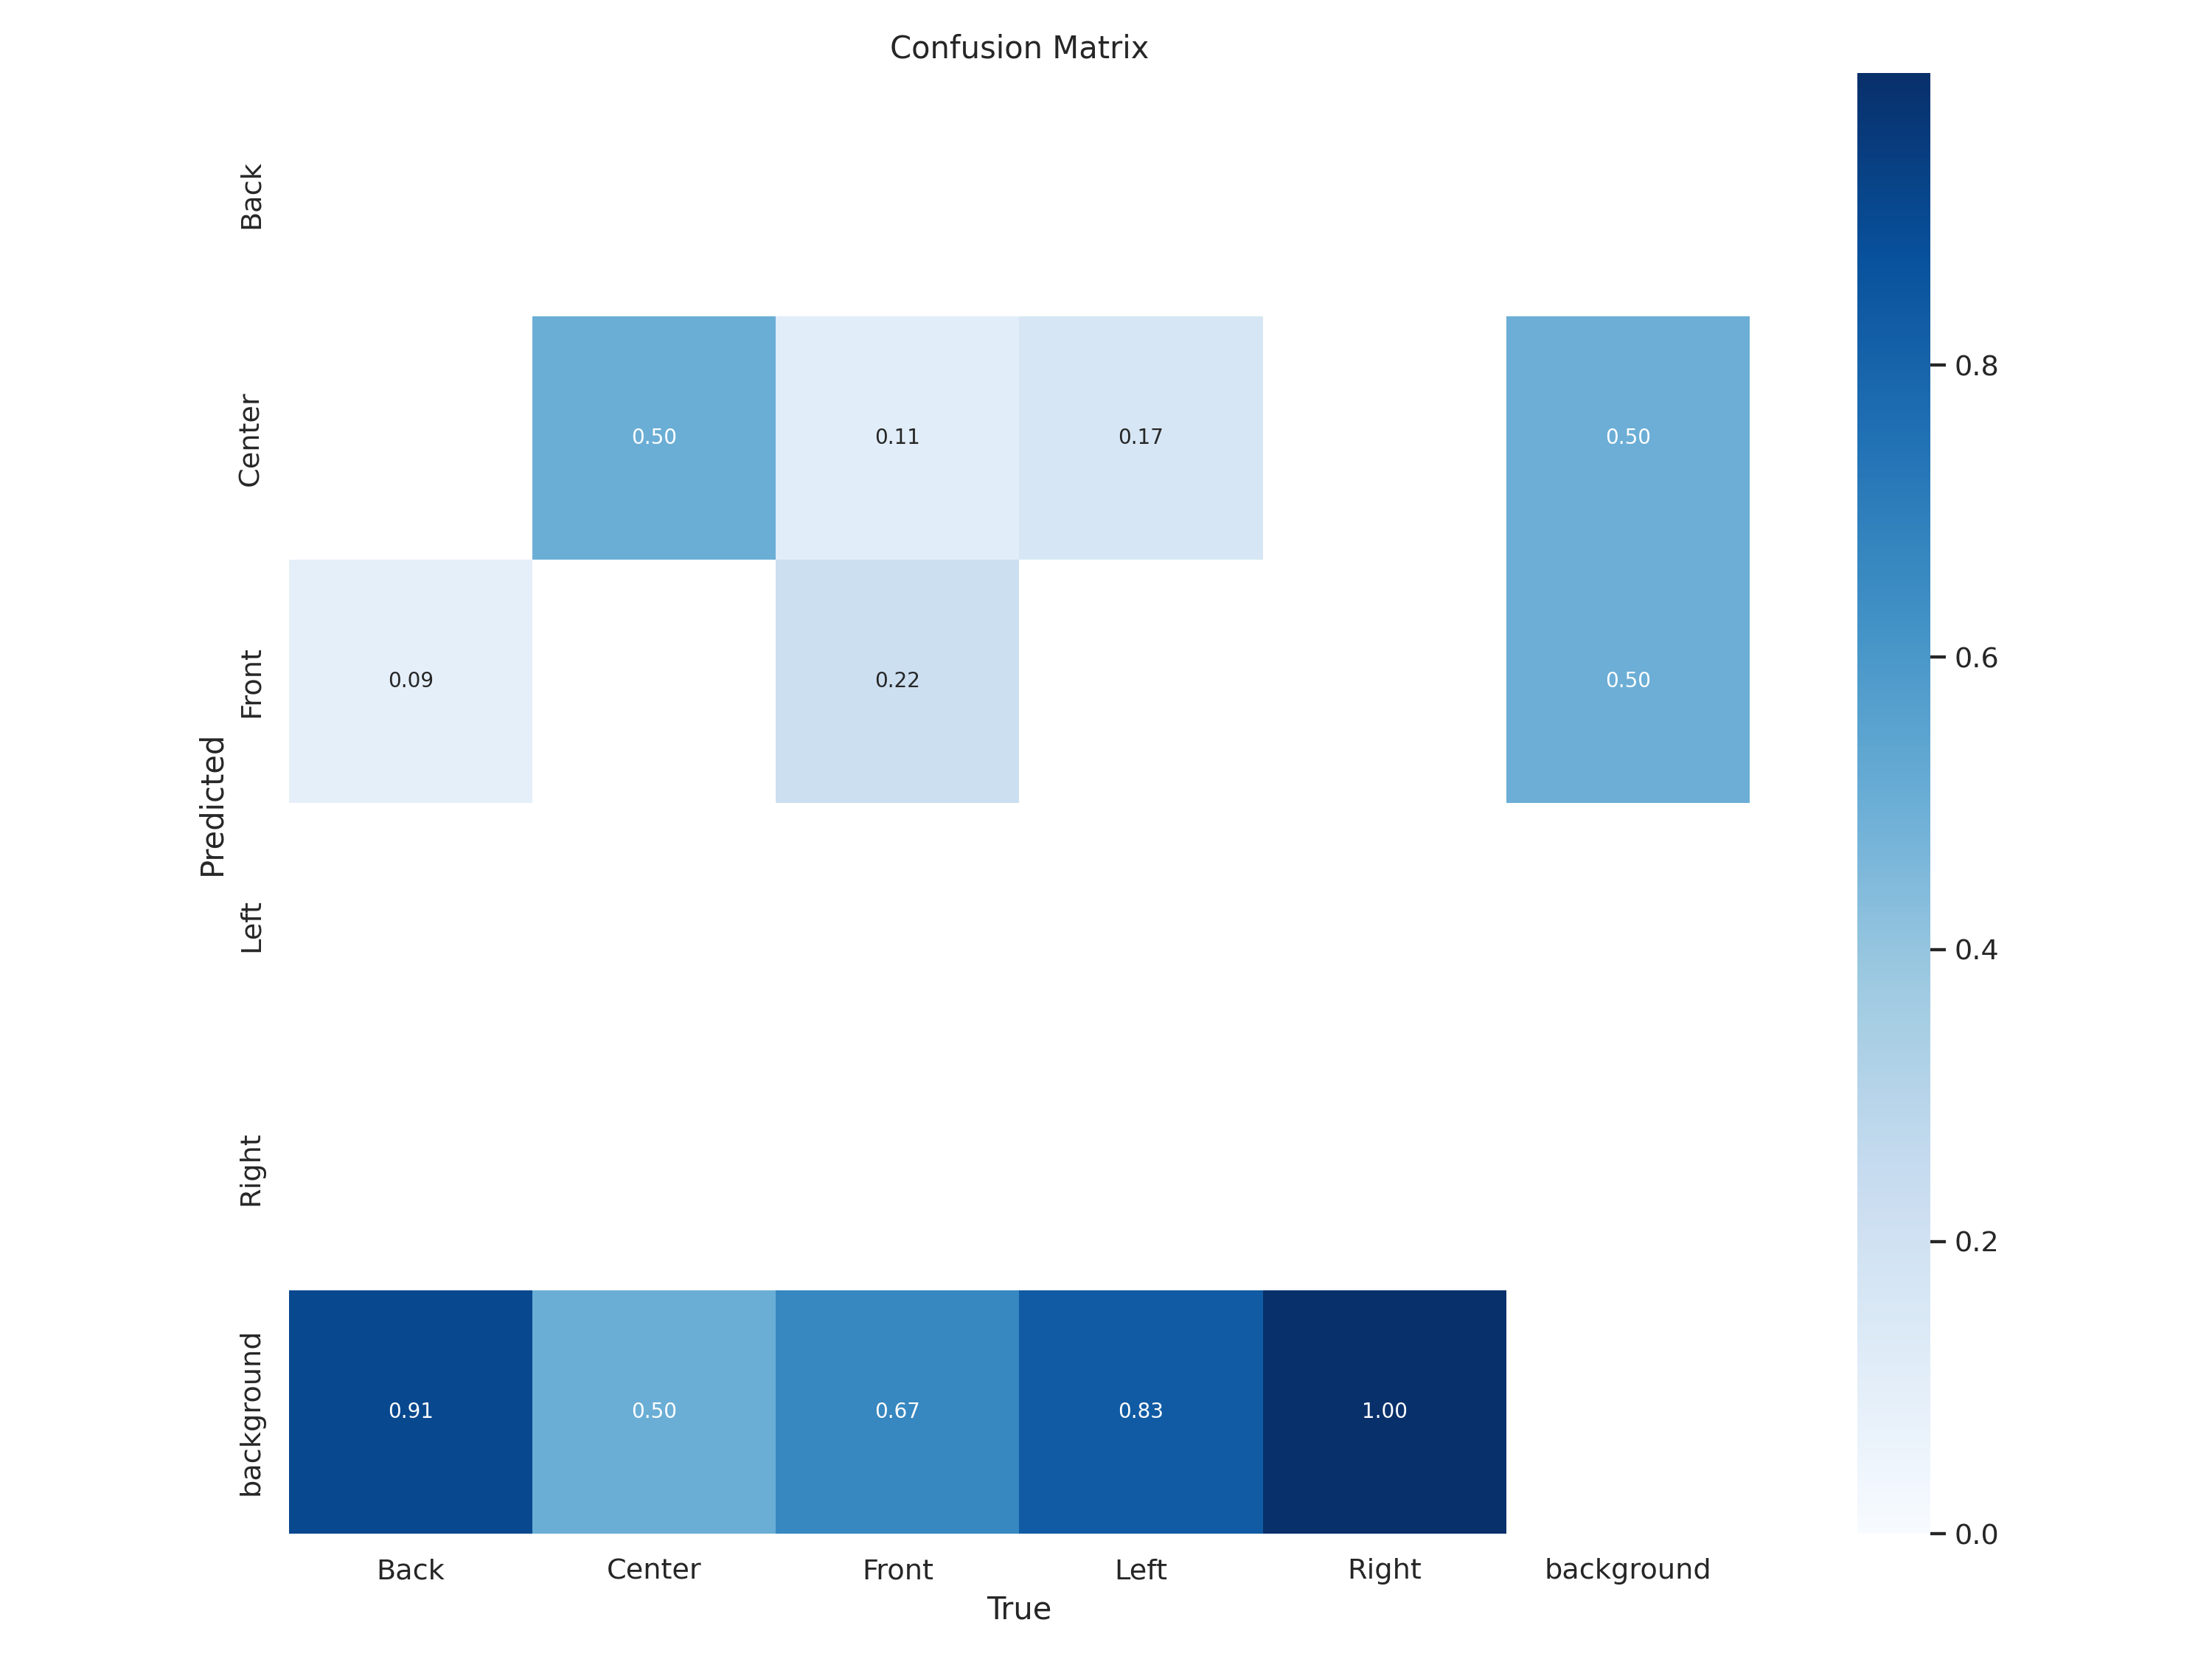

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


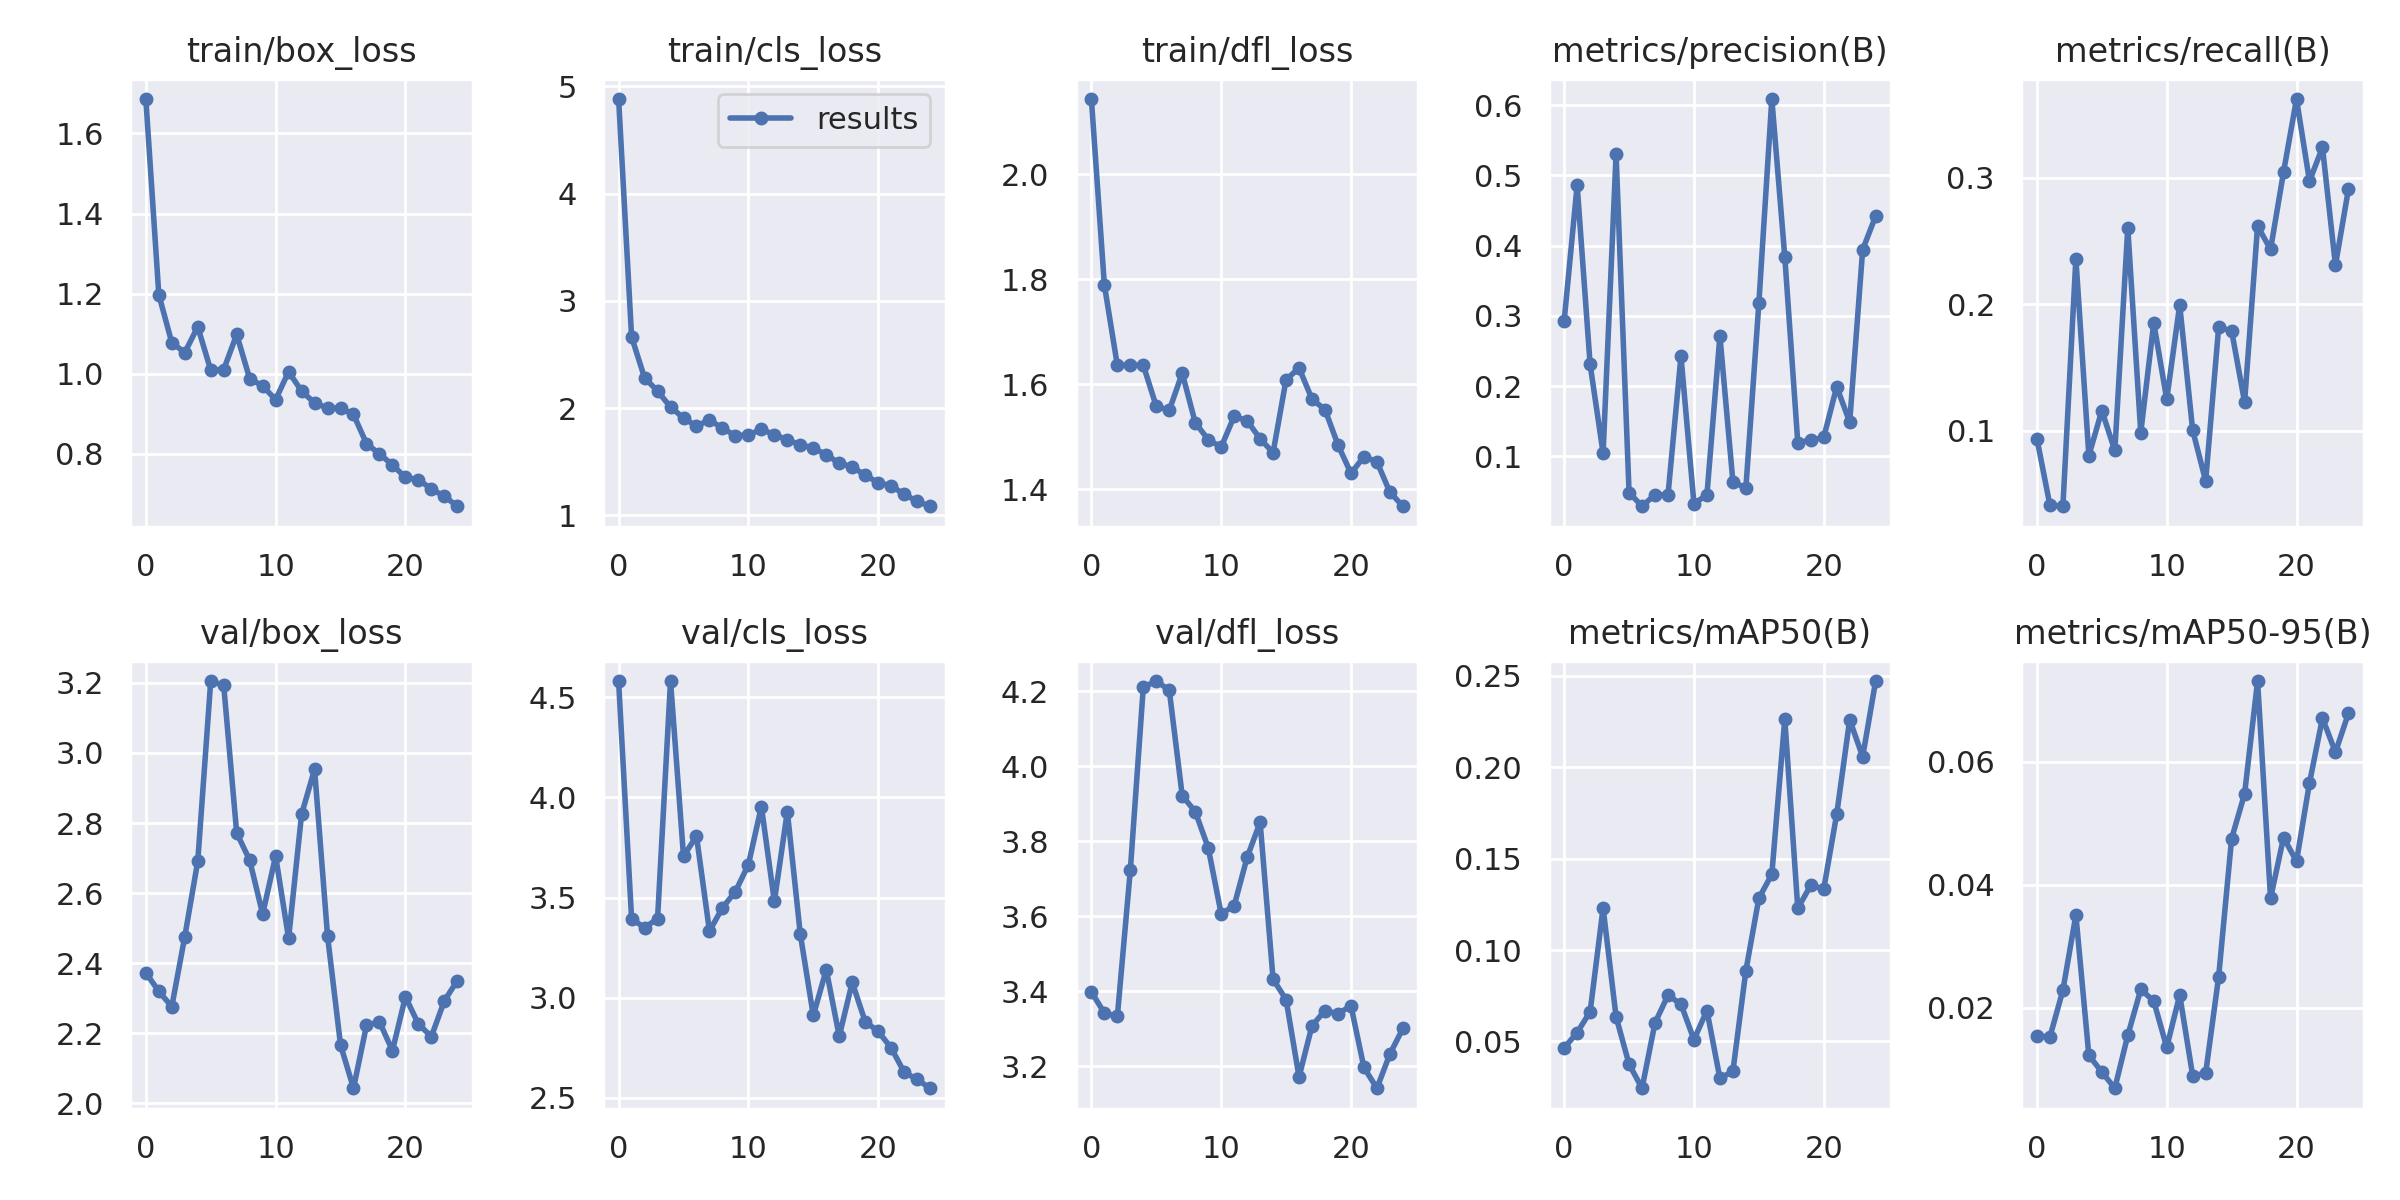

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

**Plot some battch of images during validation phase**

/content


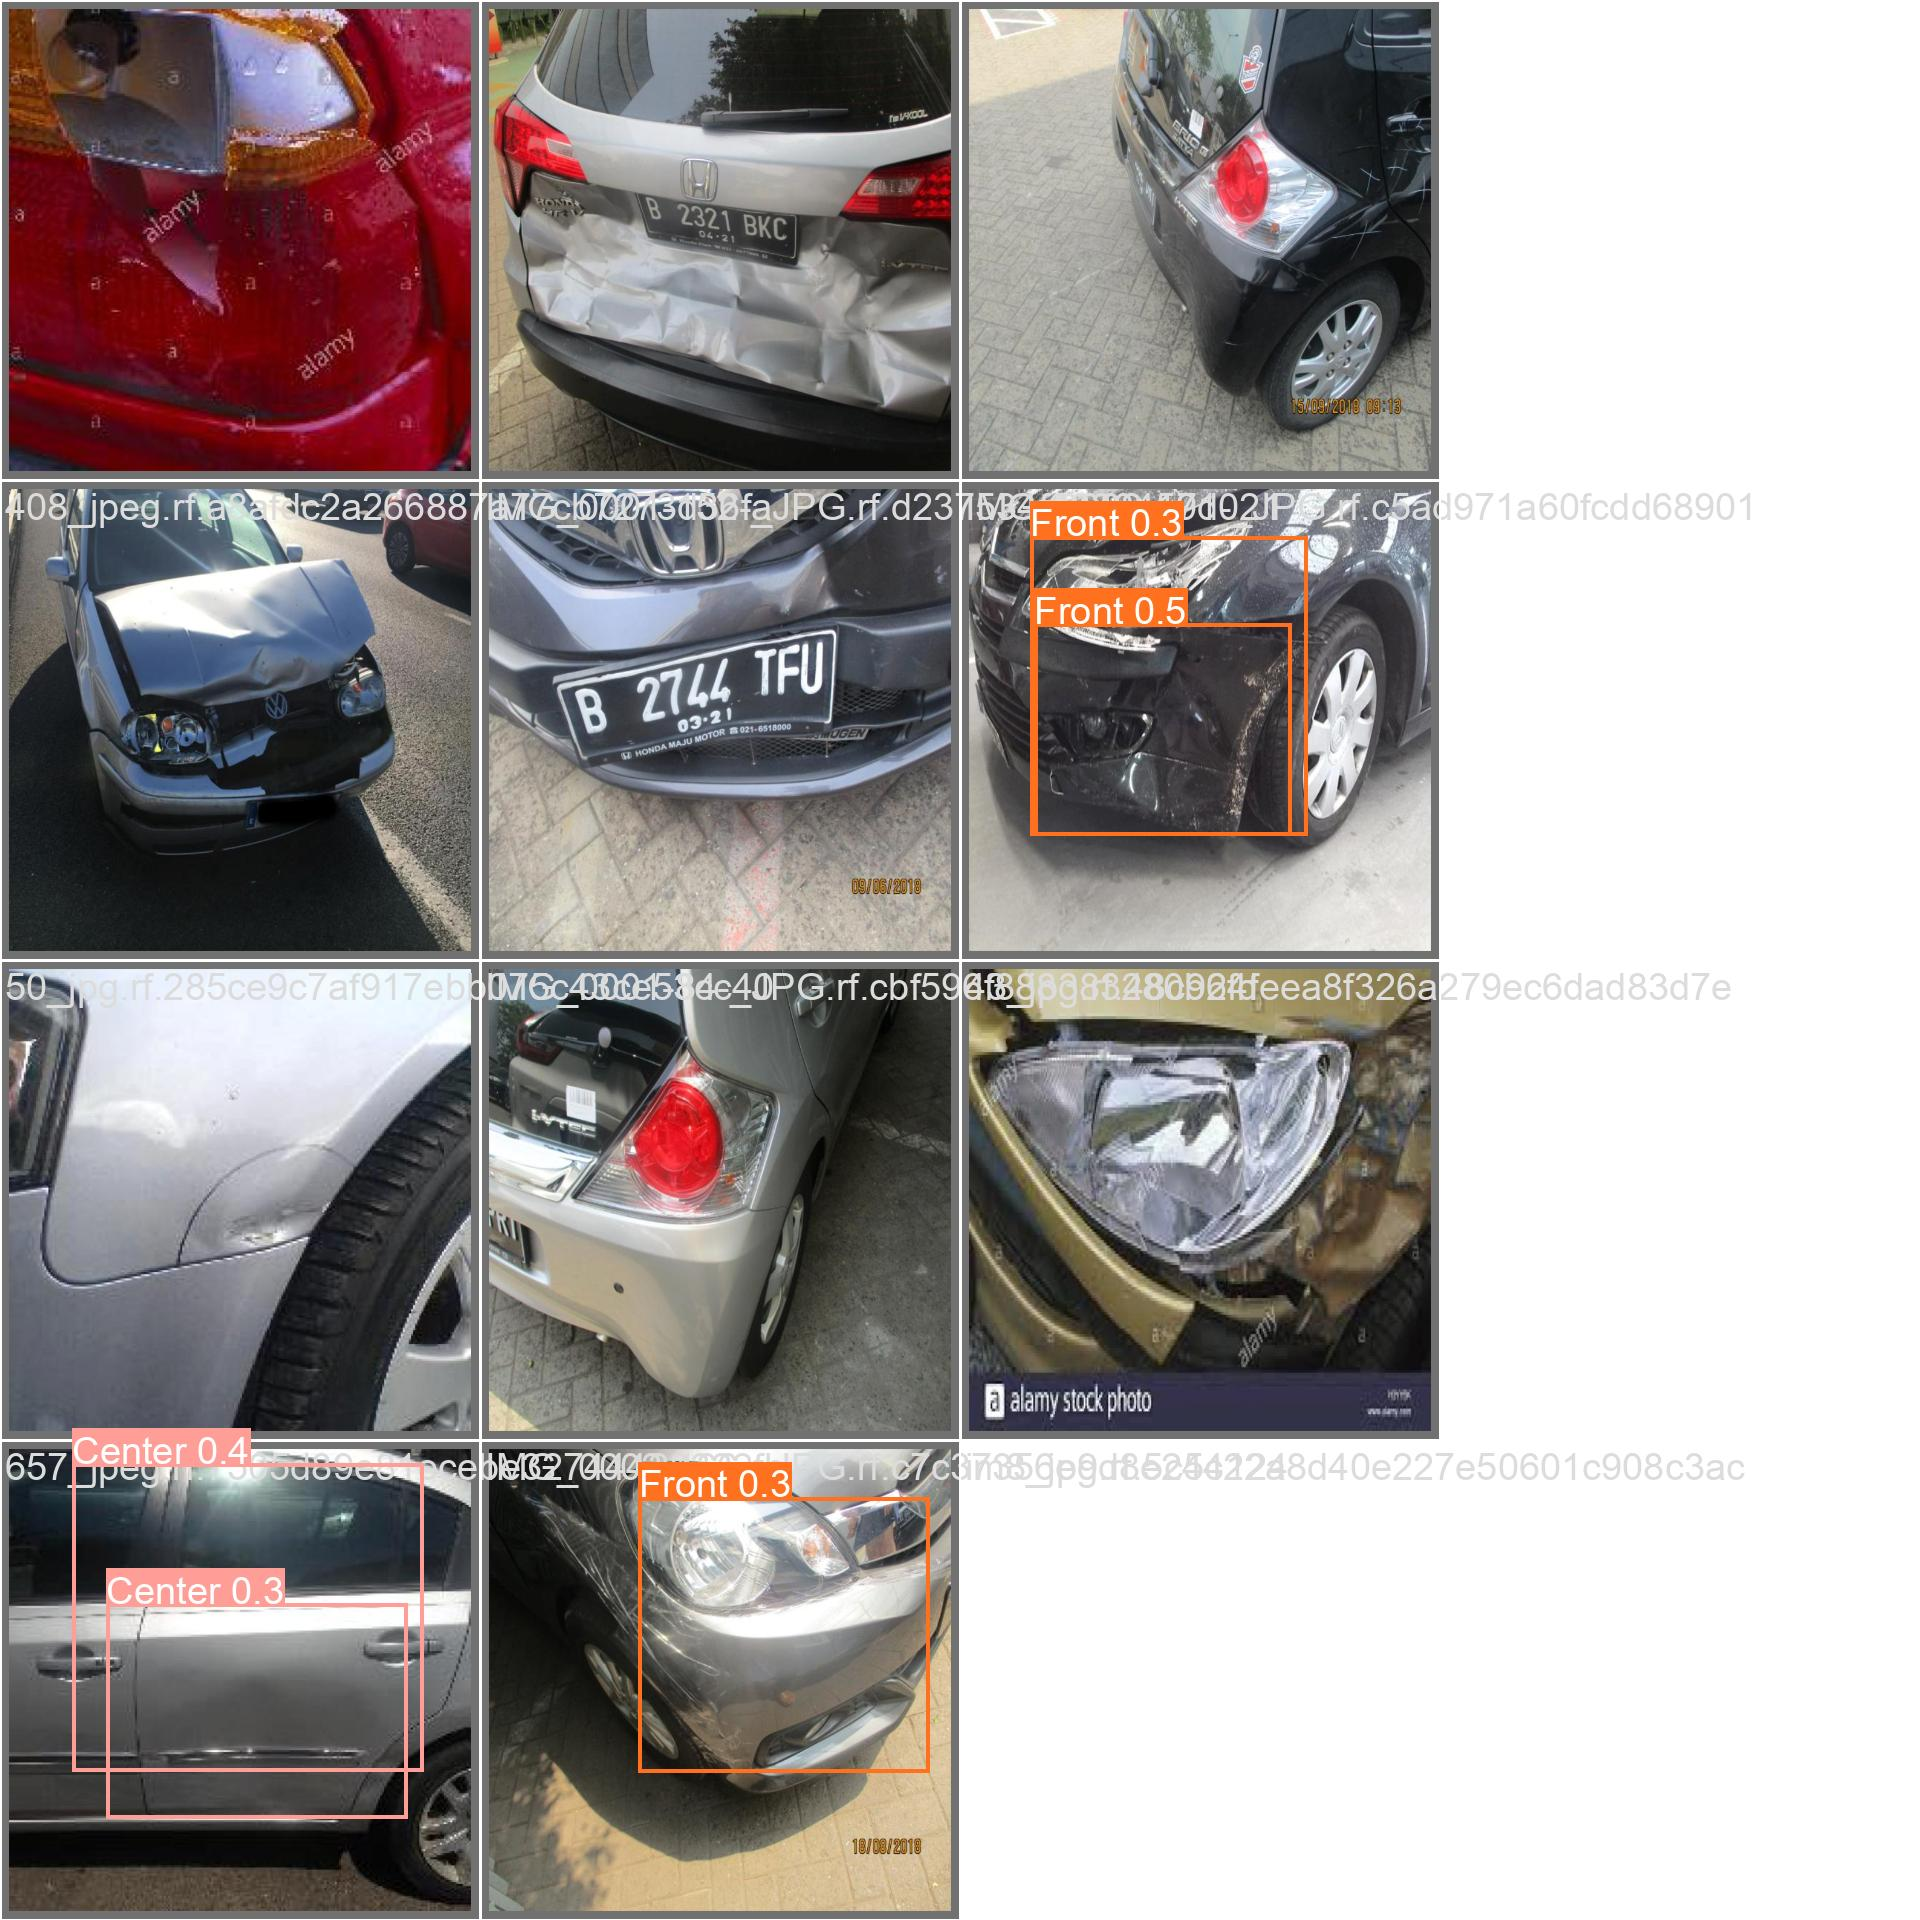

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

## Validate Custom Model

In [12]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-16 17:16:37.650911: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 17:16:40.190057: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Damage-car-1/valid/labels.cache... 43 images, 2 backgrounds, 0 corrupt: 100% 43/43 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:04<00:00,  1.42s/it]
                   all         43         41      0.385      0.262      0.227     0.0734
                  Back         43         

## Inference with Custom Model

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-16 17:16:57.715404: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 17:16:58.798091: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/22 /content/datasets/Damage-car-1/test/images/103_jpeg.rf.8665cd71c4c63e29f5727c2eaa395f66.jpg: 800x800 24.6ms
image 2/22 /content/datasets/Damage-car-1/test/images/1057_jpeg.rf.f0539740154318a4851e2f05e6b61bcf.jpg: 800x800 3 Centers, 24.6ms
image 3/22 /content/datasets/Damage-car-1/test/images/2_jpeg.rf.da4f8d93b29cba2f954f8a2629f26f84.jpg: 800x800 24.7ms
image 4/22 /content/

**Use our model after trainig**

In [19]:
from roboflow import Roboflow
rf = Roboflow(api_key="bsev6loaPoITvuBIDMHi")
project = rf.workspace().project("culpability-detection-system")
model = project.version(2).model

loading Roboflow workspace...
loading Roboflow project...


**Creat a method to detect damage in an image**

In [20]:
def IsDamage(img):
  result = model.predict(img, confidence=40, overlap=30).json()
  if(result['predictions']== []):
    return False
  else:
    return result['predictions'][0]['class']

In [24]:
#The following images are for testing
fronta_img = '/content/cara_front.jpeg'
backa_img = '/content/cara_back.jpeg'
lefta_img = '/content/cara_left.jpeg'
righta_img = '/content/cara_right.jpeg'

frontb_img = '/content/carb_front.jpeg'
backb_img = '/content/carb_back.jpeg'
leftb_img = '/content/carb_left.jpeg'
rightb_img = '/content/carb_right.jpeg'

# Create a dictionray for each image consist of image path and image label
fronta_info = {'img': fronta_img, 'label': 'front'}
backa_info = {'img': backa_img, 'label': 'back'}
lefta_info ={'img': lefta_img, 'label': 'left'}
righta_info = {'img': righta_img, 'label': 'right'}

frontb_info = {'img': frontb_img, 'label': 'front'}
backb_info = {'img': backb_img, 'label': 'back'}
leftb_info ={'img': leftb_img, 'label': 'left'}
rightb_info = {'img': rightb_img, 'label': 'right'}

#Create a list of images information for each car
carAimages = [fronta_info,  backa_info, lefta_info, righta_info]
carBimages = [frontb_info, backb_info, leftb_info, rightb_info]

In [25]:
# The method following method determine the fault percentage
def faultEstimationPersntage(carAimages, carBimages):
  if (carAimages[1]['label'] == 'back' )& (IsDamage(carAimages[1]['img']) == 'back'):
    if (carBimages[0]['label'] == 'front')&(IsDamage(carBimages[0]['img']) == 'front'):
      return "Car A 30% Car B 70%"
    else:
      return "Car A 0% Car B 100%"
  elif (carAimages[0]['label'] == 'front')&( IsDamage(carAimages[0]['img']) == 'front'):
    if (carBimages[1]['label'] == 'back') & (IsDamage(carBimages[1]['img']) == 'back'):
      return "Car A 70% Car B 30%"
    else:
      return "Car A 100% Car B 0%"
  else:
    if (carAimages[3]['label'] =='right') &( IsDamage(carAimages[3]['img']) == 'right'):
      if (carBimages[0]['label'] == 'front') & (IsDamage(carBimages[0]['img']) == 'front'):
        return "Car A 0% Car B 100%"
    else:
      if (carAimages[2]['label'] == 'left') & (IsDamage(carAimages[2]['img'])=='left'):
        if (carBimages[0]['label'] == 'front') & (IsDamage(carBimages[0]['img'])== 'front'):
            return "Car A 0% Car B 100%"
        else:
          if (carAimages[0]['label'] == 'front') & ( (IsDamage(carAimages[0]['img']) == 'left front') or (IsDamage(carAimages[0]['img'] )== 'right front')):
            return "Car A 50% Car B 50%"
          elif (carAimages[1]['label'] == 'back') & (( IsDamage(carAimages[0]['img']) == 'left front' )or (IsDamage(carAimages[0]['img'] )== 'right front')):
            return "Car A 0% Car B 100%"
          elif (carAimages[0]['label']== 'front') &(( IsDamage(carAimages[0]['img']) == 'left front') or( IsDamage(carAimages[0]['img'] )== 'right front')):
            return "Car A 30% Car B 70%"
      else:
        return "No fees"

In [26]:
faultEstimationPersntage(carAimages,carBimages)

'No fees'